# Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv') #apple stock price 
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df1 = df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [4]:
df1.shape

(1258,)

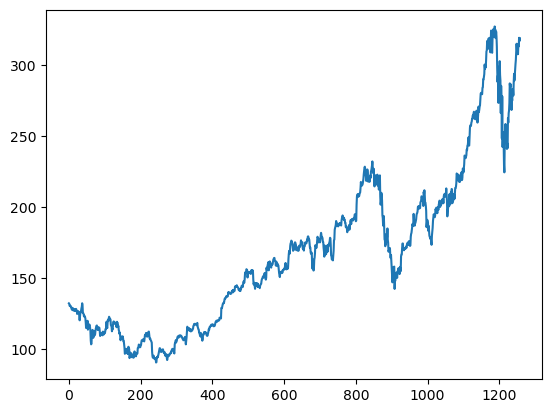

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
## LSTM is sensitive to the scale of the data, so normalize first
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [9]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
## Train test split 
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [11]:
## create input x which represents historical data based on time_step, and the truth. 
## e.g. time_step=3, use day1, day2, day3 data to predict day 4
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test,y_test = create_dataset(test_data, time_step) 
X_test

array([[0.52651355, 0.52837119, 0.53119986, ..., 0.26154691, 0.25187875,
        0.26483999],
       [0.52837119, 0.53119986, 0.53871485, ..., 0.25187875, 0.26483999,
        0.27273495],
       [0.53119986, 0.53871485, 0.5461454 , ..., 0.26483999, 0.27273495,
        0.2766191 ],
       ...,
       [0.81875369, 0.84256523, 0.84210082, ..., 0.92544119, 0.91771511,
        0.9483239 ],
       [0.84256523, 0.84210082, 0.84936249, ..., 0.91771511, 0.9483239 ,
        0.94064004],
       [0.84210082, 0.84936249, 0.85835515, ..., 0.9483239 , 0.94064004,
        0.96635143]])

In [13]:
X_train.shape

(716, 100)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-09-29 16:54:00.678747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2024-09-29 16:54:03.769045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-29 16:54:03.770273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-29 16:54:03.770958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2024-09-29 16:54:04.194522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-29 16:54:04.195759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-29 16:54:04.196461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - ETA: 0s - loss: 0.0173

2024-09-29 16:54:08.046347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-29 16:54:08.047325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-29 16:54:08.047929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 5s 175ms/step - loss: 0.0173 - val_loss: 0.0528
Epoch 2/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0010 - val_loss: 0.0065
Epoch 4/100
12/12 [==============================] - 1s 100ms/step - loss: 7.5181e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 1s 107ms/step - loss: 6.4362e-04 - val_loss: 0.0043
Epoch 6/100
12/12 [==============================] - 1s 110ms/step - loss: 6.3015e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 1s 103ms/step - loss: 7.1721e-04 - val_loss: 0.0045
Epoch 8/100
12/12 [==============================] - 1s 100ms/step - loss: 6.7213e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 1s 98ms/step - loss: 6.1268e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 1s 102ms/step - loss: 5.77

In [19]:
import tensorflow as tf

In [20]:
##  Check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2024-09-29 16:56:09.422622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-29 16:56:09.423280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-29 16:56:09.424464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 20ms/step


In [21]:
## Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
train_predict

array([[113.669586],
       [113.68649 ],
       [113.67478 ],
       [113.883026],
       [114.29781 ],
       [114.995575],
       [116.22929 ],
       [117.37448 ],
       [118.06112 ],
       [118.751526],
       [119.646645],
       [120.53332 ],
       [121.43817 ],
       [122.414444],
       [123.27579 ],
       [123.77366 ],
       [123.89968 ],
       [123.68938 ],
       [122.84162 ],
       [121.49516 ],
       [119.95513 ],
       [118.17303 ],
       [116.616516],
       [115.47043 ],
       [115.18408 ],
       [115.83645 ],
       [117.179016],
       [118.63083 ],
       [119.95828 ],
       [120.88741 ],
       [121.326805],
       [121.397224],
       [121.12232 ],
       [120.51836 ],
       [119.62956 ],
       [119.0732  ],
       [118.90213 ],
       [119.03206 ],
       [119.04242 ],
       [118.907974],
       [118.35164 ],
       [117.412315],
       [116.10923 ],
       [114.79433 ],
       [113.46816 ],
       [111.97387 ],
       [110.60545 ],
       [109.5

In [22]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

144.30452998696623

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

240.9137515258453

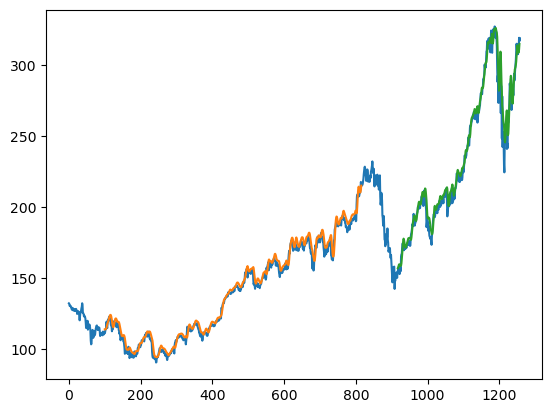

In [24]:
## Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
## Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
## Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()